# Statistics with FP and OOP

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce # for potential FP aggregation

### 1. Data Simulation

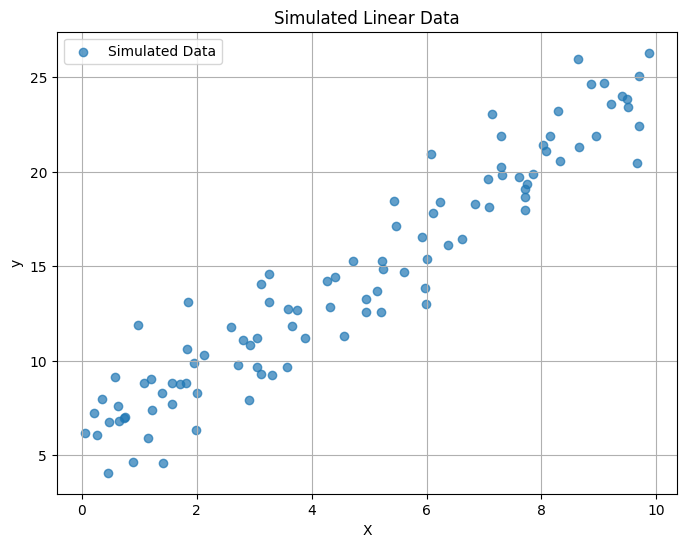

In [2]:
# We'll simulate data following the equation: y = 2*x + 5 + noise

np.random.seed(42) # for reproducibility

# Generate x values
X = np.random.rand(100, 1) * 10 # 100 data points between 0 and 10

# Generate noise
noise = np.random.randn(100, 1) * 2 # Gaussian noise with std dev of 2

# Generate y values
y = 2 * X + 5 + noise

# Plot the simulated data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7, label='Simulated Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simulated Linear Data')
plt.grid(True)
plt.legend()
plt.show()

### 2. Linear Regression with Functional Programming (FP)

--- Functional Programming Approach ---
FP Calculated Coefficients (theta): [5.43019232 1.90804535]
FP Mean Squared Error: 3.2263


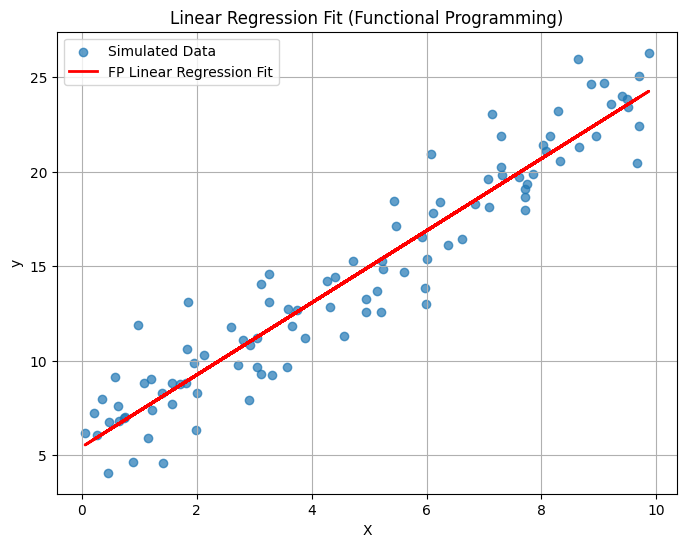

In [4]:
print("--- Functional Programming Approach ---")

def add_bias_term(X_data):
    """Adds a bias (intercept) term to the X data."""
    return np.hstack((np.ones((X_data.shape[0], 1)), X_data))

def calculate_theta(X_biased, y_data):
    """
    Calculates the optimal theta (coefficients) using the normal equation:
    theta = (X_T * X)^-1 * X_T * y
    """
    X_T = X_biased.T
    return np.linalg.inv(X_T @ X_biased) @ X_T @ y_data

def predict(X_biased, theta_params):
    """Makes predictions using the learned coefficients."""
    return X_biased @ theta_params

def mean_squared_error(y_true, y_pred):
    """Calculates the Mean Squared Error."""
    return np.mean((y_true - y_pred)**2)

# FP Pipeline
X_biased_fp = add_bias_term(X)
theta_fp = calculate_theta(X_biased_fp, y)
y_pred_fp = predict(X_biased_fp, theta_fp)
mse_fp = mean_squared_error(y, y_pred_fp)

print(f"FP Calculated Coefficients (theta): {theta_fp.flatten()}")
print(f"FP Mean Squared Error: {mse_fp:.4f}")

# Plotting FP result
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7, label='Simulated Data')
plt.plot(X, y_pred_fp, color='red', linewidth=2, label='FP Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit (Functional Programming)')
plt.grid(True)
plt.legend()
plt.show()


### 3. Linear Regression with Object-Oriented Programming (OOP) 


--- Object-Oriented Programming Approach ---
Model fitted. Coefficients: [5.43019232 1.90804535]
Training MSE: 3.2263
Test MSE: 3.2263


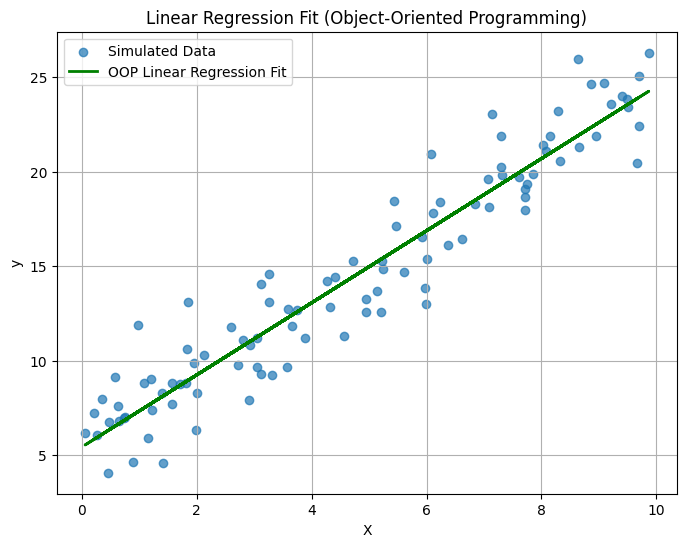


--- Comparison ---
FP Coefficients: [5.43019232 1.90804535]
OOP Coefficients: [5.43019232 1.90804535]
FP MSE: 3.2263
OOP MSE (from fit): 3.2263


In [5]:
print("\n--- Object-Oriented Programming Approach ---")

class LinearRegression:
    def __init__(self):
        """Initializes the LinearRegression model."""
        self.theta = None
        self.mse = None

    def _add_bias_term(self, X_data):
        """Private helper method to add a bias term."""
        return np.hstack((np.ones((X_data.shape[0], 1)), X_data))

    def fit(self, X_train, y_train):
        """
        Fits the linear regression model to the training data.
        Calculates coefficients using the normal equation.
        """
        X_biased = self._add_bias_term(X_train)
        X_T = X_biased.T
        # Calculate theta using the normal equation
        self.theta = np.linalg.inv(X_T @ X_biased) @ X_T @ y_train
        # Calculate MSE on training data (optional, but good for fit method)
        y_pred = self.predict(X_train)
        self.mse = np.mean((y_train - y_pred)**2)
        print(f"Model fitted. Coefficients: {self.theta.flatten()}")
        print(f"Training MSE: {self.mse:.4f}")

    def predict(self, X_test):
        """
        Makes predictions using the fitted model.
        Assumes X_test does NOT have a bias term yet.
        """
        if self.theta is None:
            raise ValueError("Model has not been fitted yet. Call .fit() first.")
        X_biased = self._add_bias_term(X_test)
        return X_biased @ self.theta

    def evaluate(self, X_test, y_test):
        """Evaluates the model's performance on test data."""
        if self.theta is None:
            raise ValueError("Model has not been fitted yet. Call .fit() first.")
        y_pred = self.predict(X_test)
        test_mse = np.mean((y_test - y_pred)**2)
        print(f"Test MSE: {test_mse:.4f}")
        return test_mse

# OOP Pipeline
model_oop = LinearRegression()
model_oop.fit(X, y) # Fit the model
y_pred_oop = model_oop.predict(X) # Make predictions on the same data
model_oop.evaluate(X, y) # Evaluate the model

# Plotting OOP result
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7, label='Simulated Data')
plt.plot(X, y_pred_oop, color='green', linewidth=2, label='OOP Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit (Object-Oriented Programming)')
plt.grid(True)
plt.legend()
plt.show()

# Compare results
print("\n--- Comparison ---")
print(f"FP Coefficients: {theta_fp.flatten()}")
print(f"OOP Coefficients: {model_oop.theta.flatten()}")
print(f"FP MSE: {mse_fp:.4f}")
print(f"OOP MSE (from fit): {model_oop.mse:.4f}")